# Wordcloud

A *Wordcloud* (nuvem de palavras) é muito utilizado para a visualização de dados, é muito útil quando está trabalhando com textos. Uma *Wordcloud* irá mostrar as palavras contidas no texto, sendo que as que aparecerem mais serão mostradas com um tamanho superior e as que aparecerem menos com um tamanho inferior. Ou seja, uma palavra que ocorre 207 vezes terá maior tamanho do que uma palavra que ocorre 125 vezes. Uma palavra que é repetida várias vezes não é à toa, tem um motivo por trás, esse motivo que é uma das grandes vantagens de utilizar o Wordcloud, em um site de pesquisas as palavras mais utilizadas vão ser as que a maior parte das pessoas querem saber, conseguindo saber isso é possível ter ações em cima do que a maior parte do público quer, fazendo com que o atinja de forma cada vez mais certeira. 





## Fazendo uma *Wordcloud*

Para fazer uma wordcloud é necessário utilizar uma biblioteca específica, a WordCloud, que não vem instalada, por padrão, no *colab*. 

Os dados utilizados serão do Airbnb referente a cidade do Rio de Janeiro, serão pegues os dados mais completos para que se possa fazer uma análise melhor. Os dados podem ser encontrados [neste link](http://insideairbnb.com/get-the-data.html).

In [1]:
!pip install wordcloud -q

In [11]:
#Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

In [3]:
DATA_PATH = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz"

#Importar o arquivo csv em df
df = pd.read_csv(DATA_PATH)

In [4]:
#Ver primeiras entradas
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,...,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,f,f,strict_14_with_grace_period,t,t,3,3,0,0,1.96
3,31560,https://www.airbnb.com/rooms/31560,20200524171540,2020-05-25,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.35
4,35636,https://www.airbnb.com/rooms/35636,20200524171540,2020-05-26,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,2.25


Esse *dataset* é muito completo, por isso está sendo utilizado. 

É necessário eliminar as linhas que estão ausentes na coluna que será analisada, para que não haja interferência na análise. A coluna *Summary* que será utilizada, ela contêm todas as respostas dos clientes em relação aos aluguéis que eles fizem, visto isso não há problema em simplesmente fazer a exclusão das linhas ausentes já que elas representam apenas a falta de resposta do cliente.

In [5]:
#Ver a quantidade de valores ausentes
print('Valores ausentes para summary: ', df.summary.isnull().sum())
print('Porcentagem ausentes para summary: {:.2f}%'.format(df.summary.isnull().sum()/df.summary.shape[0] * 100))

#Eliminar as colunas com valores ausentes 
summary = df.dropna(subset=['summary'], axis=0)['summary']

Valores ausentes para summary:  2577
Porcentagem ausentes para summary: 7.20%


A quantidade de entradas ausentes da coluna Summary é pequena, se comparada com a quantidade total de entradas.

In [6]:
#Concaternar as palavras
all_summary = " ".join(s for s in summary)

print('Quantidade de palavras: {}'.format(len(all_summary)))

Quantidade de palavras: 10003725


Antes de criar a wordcloud é importante utilizar uma lista para que algumas palavras não apareçam nele. O conteúdo dessa lista é para evitar que seja plotado dados que não são relevantes para a visualização/análise, como por exemplo as palavras "a", "e", "de", "da", entre diversas outras. 

Para fazer isso será utilizar o STOPWORDS que é proveniente da própria biblioteca que está sendo utilizada. 

Logo após fazer isso já é possível gerar a wordcloud de forma mais limpa.

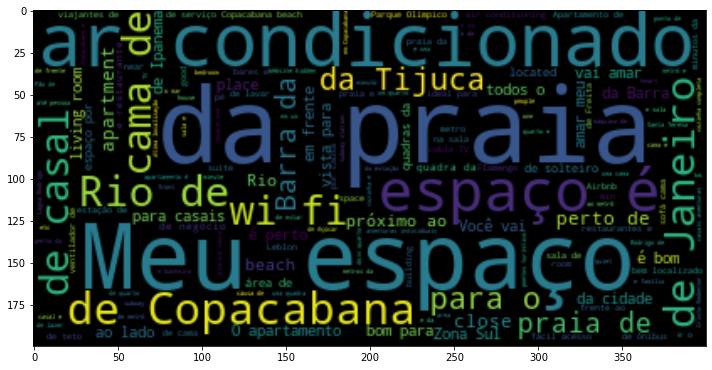

In [7]:
#Lista de stopword
stopwords = set(STOPWORDS)

#Gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color='black').generate(all_summary)

#Mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Percebe-se que algumas palavras como "meu" e "da" ainda estão em destaque, não foram retiradas, isso é porquê o STOPWORDS foi feito para funcionar melhor em textos em inglês, então ele não faz a eliminação de todas as palavras que são redundantes. Para resolver esse problema basta acrescentar mais alguma palavras na váriaviel stopwords utilizada anteriormente.

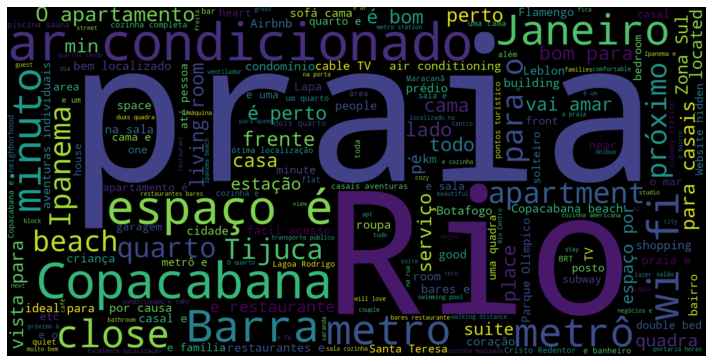

In [8]:
#Lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(['da', 'meu', 'em', 'você', 'de', 'ao', 'os'])

#Gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=1600, height=800).generate(all_summary)

#Mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off() #Não mostrar os eixos

plt.tight_layout()
wordcloud.to_file('airbnb_summary_wordcloud.png') #Salvar a wordcloud como imagem

## Gerando *Wordcloud* com imagem

É possível, também, gerar *wordclouds* utilizando imagens de forma que ficará ainda mais atrativo. 

Observação: Para a máscara funcionar a imagem tem que estar em preto e branco.

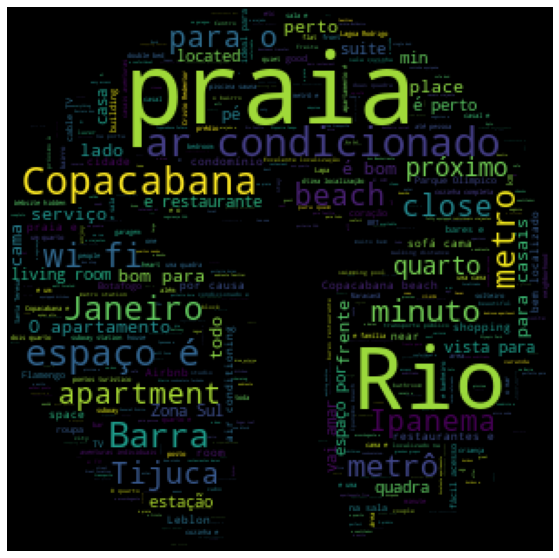

In [20]:
#Endereço da imagem
rio_mask = np.array(Image.open('/home/renata/Desktop/Cursos/Data-Science-na-Pratica/Imagens/Cristo.png'))

#Gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1000,
                      height=1000,
                      max_words=1500,
                      mask=rio_mask,
                      max_font_size=200,
                      min_font_size=1).generate(all_summary)

#Mostrar imagem final
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud_mask.png")